# Regression using Deep Neural Networks

## Load Dataset from sklearn

In [28]:
!pip install matplotlib seaborn pandas sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [30]:
boston = pd.read_csv("BostonHousing.csv")

In [31]:
df = boston.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [32]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [33]:
df = df.iloc[:, :-1]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [36]:
scaler = StandardScaler()
df.iloc[:, :-1]  = scaler.fit_transform(df.iloc[:, :-1])
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,34.7


In [37]:
df.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,-0.865302,22.0
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,-0.669058,11.9


## Train Model with PyTorch

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [39]:
df.values

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
        -1.0755623 , 24.        ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
        -0.49243937, 21.6       ],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
        -1.2087274 , 34.7       ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.98304761, 23.9       ],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.86530163, 22.        ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.66905833, 11.9       ]])

In [40]:
data = torch.from_numpy(df.values).float()

data.shape

torch.Size([506, 13])

In [43]:
x = data[:, :-1]
y = data[:, -1:]

print(x)
print()
print(y)

print(x.shape, y.shape)

tensor([[-0.4198,  0.2848, -1.2879,  ..., -0.6666, -1.4590, -1.0756],
        [-0.4173, -0.4877, -0.5934,  ..., -0.9873, -0.3031, -0.4924],
        [-0.4173, -0.4877, -0.5934,  ..., -0.9873, -0.3031, -1.2087],
        ...,
        [-0.4134, -0.4877,  0.1157,  ..., -0.8032,  1.1765, -0.9830],
        [-0.4078, -0.4877,  0.1157,  ..., -0.8032,  1.1765, -0.8653],
        [-0.4150, -0.4877,  0.1157,  ..., -0.8032,  1.1765, -0.6691]])

tensor([[24.0000],
        [21.6000],
        [34.7000],
        [33.4000],
        [36.2000],
        [28.7000],
        [22.9000],
        [27.1000],
        [16.5000],
        [18.9000],
        [15.0000],
        [18.9000],
        [21.7000],
        [20.4000],
        [18.2000],
        [19.9000],
        [23.1000],
        [17.5000],
        [20.2000],
        [18.2000],
        [13.6000],
        [19.6000],
        [15.2000],
        [14.5000],
        [15.6000],
        [13.9000],
        [16.6000],
        [14.8000],
        [18.4000],
        [21.00

In [42]:
n_epochs = 100000
learning_rate = 1e-4
print_interval = 5000

## Build Models

### Build Model using nn.Module

In [44]:
relu = nn.ReLU()
leaky_relu = nn.LeakyReLU(0.1)

In [45]:
class MyModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        super().__init__()
        
        # layer를 3개 만들어 놓음 
        self.linear1 = nn.Linear(input_dim, 3)
        self.linear2 = nn.Linear(3, 3)
        self.linear3 = nn.Linear(3, output_dim)
        self.act = nn.ReLU()  
        # activation function
        
    def forward(self, x):
        # |x| = (batch_size, input_dim)
        h = self.act(self.linear1(x)) # |h| = (batch_size, 3) >>(506,3)
        h = self.act(self.linear2(h)) # (506,3)
        y = self.linear3(h)  
        # |y| = (batch_size, output_dim) >> (506, 1)
        
        return y
    
model = MyModel(x.size(-1), y.size(-1))

model

MyModel(
  (linear1): Linear(in_features=12, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)

### Build Model with LeakyReLU using nn.Sequential

In [46]:
model = nn.Sequential(
    nn.Linear(x.size(-1), 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, 3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1)),
)

model

Sequential(
  (0): Linear(in_features=12, out_features=3, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=3, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=3, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=3, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=3, out_features=1, bias=True)
)

In [47]:
optimizer = optim.SGD(model.parameters(),
                      lr=learning_rate)

In [48]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, loss))

Epoch 5000: loss=8.2679e+01
Epoch 10000: loss=1.1157e+01
Epoch 15000: loss=1.0192e+01
Epoch 20000: loss=8.3750e+00
Epoch 25000: loss=7.7376e+00
Epoch 30000: loss=7.5168e+00
Epoch 35000: loss=7.4799e+00
Epoch 40000: loss=7.4673e+00
Epoch 45000: loss=7.4600e+00
Epoch 50000: loss=7.4572e+00
Epoch 55000: loss=7.4549e+00
Epoch 60000: loss=7.4538e+00
Epoch 65000: loss=7.4525e+00
Epoch 70000: loss=7.4517e+00
Epoch 75000: loss=7.4506e+00
Epoch 80000: loss=7.4496e+00
Epoch 85000: loss=7.4501e+00
Epoch 90000: loss=7.4477e+00
Epoch 95000: loss=7.4466e+00
Epoch 100000: loss=7.4456e+00


## Let's see the result!

c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ppos7\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


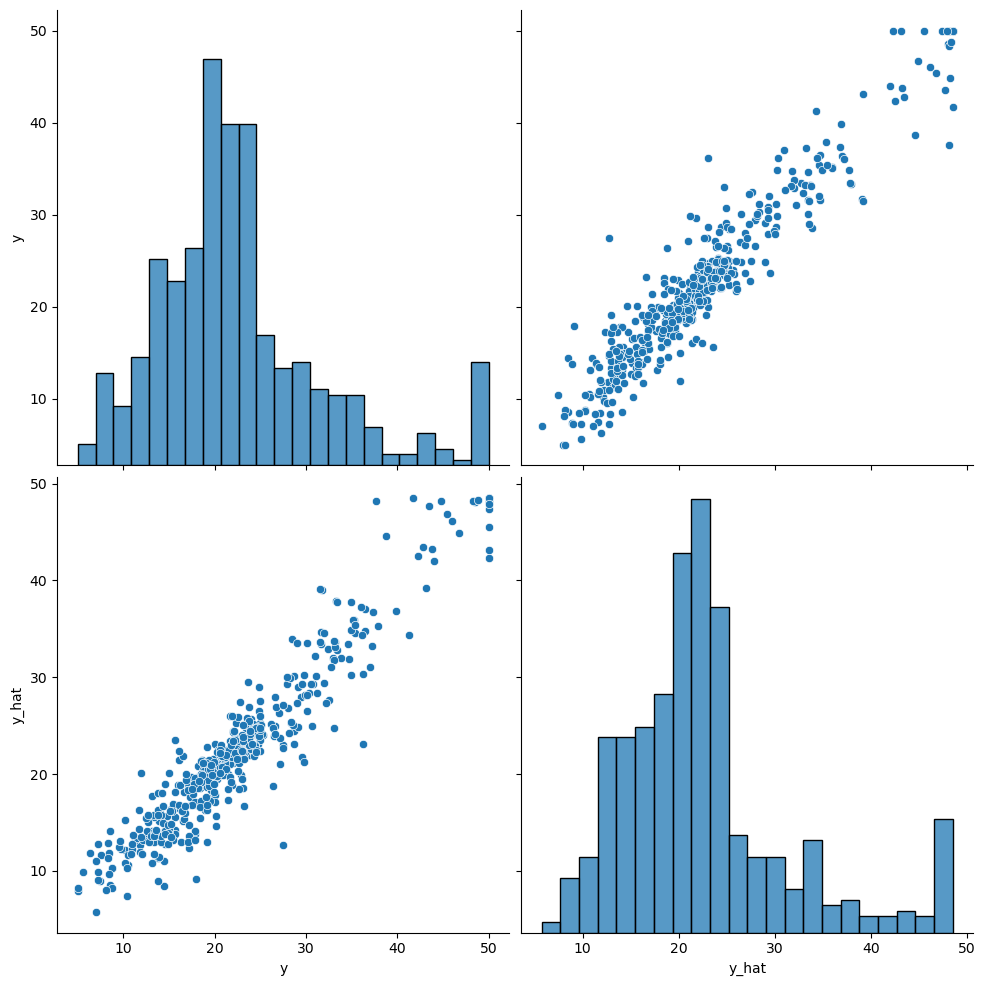

In [49]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()